<a href="https://colab.research.google.com/github/jacksonsin/data_science_with_python/blob/main/Predicting_stock_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The script loads stock price data from a CSV file, extracts the closing prices and dates, splits the data into training and test sets, and uses a linear regression model to predict stock prices. The script then calculates the mean squared error (MSE) of the predictions, which is a measure of how accurate the model is.

This is a simple example and it may not be perfect for your use case, but it shows the basic process of how you can use machine learning to predict stock prices.

The format of a stock price data CSV file can vary depending on the source, but typically it will include the following columns:
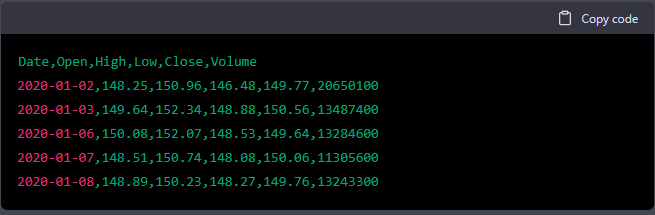

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Load the stock data
data = pd.read_csv('/content/Tesla.csv.csv')

In [3]:
# Extract the closing prices
prices = data['Close']

In [4]:
# Extract the dates and convert them to a NumPy array
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')


In [5]:
data['Date'] = data['Date'].astype('datetime64[D]')

In [6]:
dates = np.array(data['Date']).reshape(-1, 1)

In [7]:
# Reshape the prices array to 2D
prices = prices.values.reshape(-1, 1)

In [8]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(dates, prices, test_size=0.2, shuffle=False)

In [9]:
# Create a linear regression model
model = LinearRegression()

In [10]:
# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [11]:
x_input = X_test.astype(float)

In [12]:
# Make predictions on the test data
predictions = model.predict(x_input)

In [13]:
# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, predictions)
print(f'Mean squared error: {mse}')

Mean squared error: 6657.96033845616


In [14]:
y_test = pd.DataFrame(predictions, columns=["Predicted_value"])

In [15]:
#y_test = pd.DataFrame(y_test)
X_test = pd.DataFrame(X_test, columns=["DATE"])

In [36]:
# concatenate the two dataframes along the columns
result = pd.concat([X_test, y_test], axis=1)
result

,DATE,Predicted_value
0,2015-11-11,257.427051
1,2015-11-12,257.576304
2,2015-11-13,257.725557
3,2015-11-16,258.173317
4,2015-11-17,258.322570
...,...,...
334,2017-03-13,330.262634
335,2017-03-14,330.411888
336,2017-03-15,330.561141
337,2017-03-16,330.710394
